# `dsptoolbox.*`

General use functions are accesible directly from the `dsptoolbox.` module. Here are some of them demonstrated.

Note that the functions never act modify a signal on-place but rather return a copy of the signal with updated data.

In [9]:
import dsptoolbox as dsp
from os.path import join

### General

RMS of speech:  [-19.50131172]
RMS of speech (normalized):  [-22.49229458]
Length of speech [samples]:  189056
Length of speech (normalized) [samples]:  96000
Number of channels in merged signal:  2


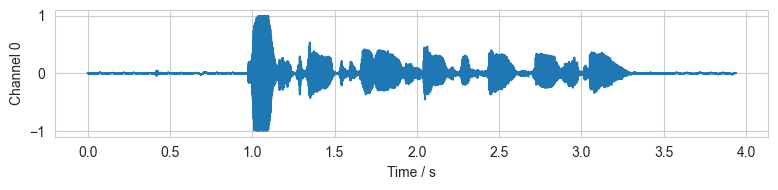

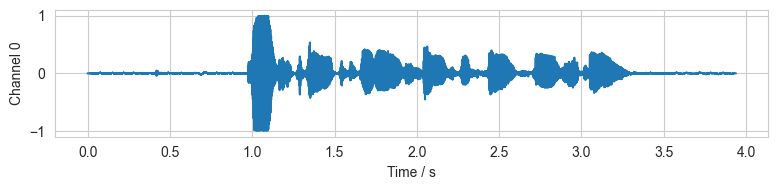

In [10]:
speech = dsp.Signal(join('data', 'speech.flac'))

# RMS of a signal
print('RMS of speech: ', dsp.rms(speech))

# Normalize signal
speech_norm = dsp.normalize(speech, peak_dbfs=-3, each_channel=False)
print('RMS of speech (normalized): ', dsp.rms(speech_norm))

# Pad or trim a signal
speech_norm = dsp.pad_trim(
    speech, desired_length_samples=2*speech.sampling_rate_hz)
print('Length of speech [samples]: ', len(speech))
print('Length of speech (normalized) [samples]: ', len(speech_norm))

# Detrend the signal from a polynomial trend
speech_detrended = dsp.detrend(speech, polynomial_order=1)

# Fade signal start or end
speech_faded = dsp.fade(speech, type_fade='log', length_fade_seconds=0.2)

# Merge two signals into one by stacking their channels
print('Number of channels in merged signal: ',
      dsp.merge_signals(speech, speech_faded).number_of_channels)

speech.plot_time()
speech_faded.plot_time();

### Voice activity detector
This voice activity detector finds segments where a voice is present by means of an energy threshold. It is possible to pre-filter the signal prior to the detection.

(<Figure size 800x200 with 1 Axes>,
 [<AxesSubplot: xlabel='Time / s', ylabel='Channel 0'>])

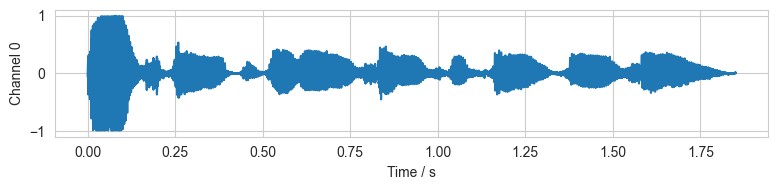

In [11]:
f = dsp.Filter('iir', {'type_of_pass': 'bandpass',
                       'filter_design_method': 'bessel',
                       'order': 10, 'freqs': [100, 500]},
               sampling_rate_hz=speech.sampling_rate_hz)
sp_detected, _ = dsp.activity_detector(speech, threshold_dbfs=-25,
                                       pre_filter=f, hold_time_ms=0.1,
                                       release_time_ms=30)
sp_detected.plot_time()

# Listen to detected audio
# dsp.audio_io.play(sp_detected)

### Latency between signals
The latency between two signals can be computed through the correlation method.

In [12]:
aud1 = dsp.Signal(join('data', 'chirp.wav'))
aud2 = dsp.Signal(join('data', 'chirp_mono.wav'))
print('Latency [s]: ', dsp.latency(aud2, aud1) / aud1.sampling_rate_hz)

Latency [s]:  [0.2738125]


### True peak level
This function finds the true peak level with the upsampling method.

Peak level [dB]:  [-0.00901714]
True peak level [dB]:  [0.0004711]
Difference [dB]:  [0.00948824]


(<Figure size 800x200 with 1 Axes>,
 [<AxesSubplot: xlabel='Time / s', ylabel='Channel 0'>])

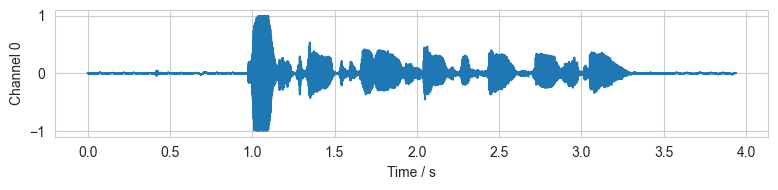

In [13]:
tp, p = dsp.true_peak_level(speech)
print('Peak level [dB]: ', p)
print('True peak level [dB]: ', tp)
print('Difference [dB]: ', tp-p)
speech.plot_time()